In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('hp_data.csv')
data.head(2)

,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk,price
0,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1,6300000
1,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000


In [3]:
data.shape

(3500, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   place       3500 non-null   object
 1   built       3500 non-null   object
 2   sqft        3500 non-null   int64 
 3   sale        3500 non-null   object
 4   yearsOld    3500 non-null   int64 
 5   floor       3500 non-null   int64 
 6   totalFloor  3500 non-null   int64 
 7   bhk         3500 non-null   int64 
 8   price       3500 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 246.2+ KB


In [5]:
data.isnull().sum()

place         0
built         0
sqft          0
sale          0
yearsOld      0
floor         0
totalFloor    0
bhk           0
price         0
dtype: int64

In [6]:
data.describe()

,sqft,yearsOld,floor,totalFloor,bhk,price
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3.500000e+03
mean,1538.163143,7.602000,4.197714,6.371429,4.197714,8.067807e+06
std,416.264178,3.803196,4.782410,4.461808,4.782410,4.984973e+06
min,1019.000000,1.000000,1.000000,4.000000,1.000000,3.800000e+06
25%,1200.000000,5.000000,1.000000,4.000000,1.000000,4.800000e+06
50%,1543.000000,5.000000,3.000000,4.000000,3.000000,6.600000e+06
75%,1784.000000,10.000000,4.000000,5.000000,4.000000,1.050000e+07
max,4856.000000,15.000000,18.000000,29.000000,18.000000,4.750000e+07


In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()
data["place"] = label_encoder.fit_transform(data["place"])

# or you can use another type of encoders
encoder = OneHotEncoder(sparse=False, drop='first')
data["place"] = encoder.fit_transform(data[["place"]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
data

,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk,price
0,0.0,Super built-up Area,1450,Resale,5,1,4,1,6300000
1,0.0,Super built-up Area,2190,Resale,5,3,5,3,11500000
2,0.0,Super built-up Area,1019,Resale,1,2,5,2,3800000
3,1.0,Super built-up Area,1857,Resale,15,4,5,4,10500000
4,0.0,Super built-up Area,2190,Resale,5,3,5,3,11500000
...,...,...,...,...,...,...,...,...,...
3495,0.0,Super built-up Area,1019,Resale,1,2,5,2,3800000
3496,0.0,Super built-up Area,1450,Resale,5,1,4,1,6300000
3497,0.0,Super built-up Area,1330,Resale,10,1,4,1,7350000
3498,0.0,Built-up Area,1200,Resale,10,1,4,1,4800000


In [9]:
X=data[['place','sqft','yearsOld','floor','bhk']]
y=data[['price']]

In [10]:
X

,place,sqft,yearsOld,floor,bhk
0,0.0,1450,5,1,1
1,0.0,2190,5,3,3
2,0.0,1019,1,2,2
3,1.0,1857,15,4,4
4,0.0,2190,5,3,3
...,...,...,...,...,...
3495,0.0,1019,1,2,2
3496,0.0,1450,5,1,1
3497,0.0,1330,10,1,1
3498,0.0,1200,10,1,1


In [11]:
y


,price
0,6300000
1,11500000
2,3800000
3,10500000
4,11500000
...,...
3495,3800000
3496,6300000
3497,7350000
3498,4800000


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [13]:
X_train

,place,sqft,yearsOld,floor,bhk
2619,0.0,1200,10,1,1
2411,0.0,1019,1,2,2
2271,1.0,1857,15,4,4
250,0.0,1100,5,3,3
720,0.0,1200,10,1,1
...,...,...,...,...,...
2763,0.0,1784,5,18,18
905,0.0,1330,10,1,1
1096,0.0,1543,10,3,3
235,0.0,2475,5,15,15


In [14]:
X_train.shape

(2625, 5)

In [15]:
y_train

,price
2619,4800000
2411,3800000
2271,10500000
250,4900000
720,4800000
...,...
2763,7900000
905,7350000
1096,4025000
235,29300000


In [16]:
y_train.shape

(2625, 1)

In [17]:
X_test

,place,sqft,yearsOld,floor,bhk
1322,0.0,2190,5,3,3
975,1.0,1857,15,4,4
3085,0.0,2190,5,3,3
1263,0.0,1200,10,1,1
1533,0.0,1100,5,3,3
...,...,...,...,...,...
1498,0.0,1330,10,1,1
1907,0.0,1450,5,1,1
1504,0.0,1784,5,18,18
525,0.0,1450,5,1,1


In [18]:
X_test.shape

(875, 5)

In [19]:
y_test.shape

(875, 1)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model

LinearRegression()

In [22]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
c=model.intercept_
c

array([-7167676.13505903])

In [24]:
m=model.coef_
m

array([[-1.71379258e+06,  9.36583948e+03,  1.32262942e+05,
         6.45083699e+02,  6.45083699e+02]])

In [25]:
y_predict = model.predict(X_test)
y_predict

array([[14008697.53765169],
       [10500000.00000003],
       [14008697.53765169],
       [ 5395250.82979467],
       [ 3799932.50541916],
       [ 3799932.50541916],
       [10225519.22010281],
       [10500000.00000003],
       [ 7075395.9883124 ],
       [ 2510957.5712047 ],
       [10500000.00000003],
       [ 6612809.96207928],
       [ 5395250.82979467],
       [ 5395250.82979467],
       [10500000.00000003],
       [16910817.60877849],
       [ 7075395.9883124 ],
       [10225519.22010281],
       [10225519.22010281],
       [16910817.60877849],
       [ 5395250.82979467],
       [ 3799932.50541916],
       [ 3799932.50541916],
       [ 9822377.90092598],
       [ 3799932.50541916],
       [ 3799932.50541916],
       [ 5395250.82979467],
       [ 3799932.50541916],
       [ 6612809.96207928],
       [ 2510957.5712047 ],
       [10225519.22010281],
       [ 2510957.5712047 ],
       [14008697.53765169],
       [10225519.22010281],
       [ 2510957.5712047 ],
       [ 6612809.962

In [26]:
y_test

,price
1322,11500000
975,10500000
3085,11500000
1263,4800000
1533,4900000
...,...
1498,7350000
1907,6300000
1504,7900000
525,6300000


In [27]:
model.predict(X_test)

array([[14008697.53765169],
       [10500000.00000003],
       [14008697.53765169],
       [ 5395250.82979467],
       [ 3799932.50541916],
       [ 3799932.50541916],
       [10225519.22010281],
       [10500000.00000003],
       [ 7075395.9883124 ],
       [ 2510957.5712047 ],
       [10500000.00000003],
       [ 6612809.96207928],
       [ 5395250.82979467],
       [ 5395250.82979467],
       [10500000.00000003],
       [16910817.60877849],
       [ 7075395.9883124 ],
       [10225519.22010281],
       [10225519.22010281],
       [16910817.60877849],
       [ 5395250.82979467],
       [ 3799932.50541916],
       [ 3799932.50541916],
       [ 9822377.90092598],
       [ 3799932.50541916],
       [ 3799932.50541916],
       [ 5395250.82979467],
       [ 3799932.50541916],
       [ 6612809.96207928],
       [ 2510957.5712047 ],
       [10225519.22010281],
       [ 2510957.5712047 ],
       [14008697.53765169],
       [10225519.22010281],
       [ 2510957.5712047 ],
       [ 6612809.962

In [37]:
yhat = m*X
X, yhat

(      place  sqft  yearsOld  floor  bhk
 0       0.0  1450         5      1    1
 1       0.0  2190         5      3    3
 2       0.0  1019         1      2    2
 3       1.0  1857        15      4    4
 4       0.0  2190         5      3    3
 ...     ...   ...       ...    ...  ...
 3495    0.0  1019         1      2    2
 3496    0.0  1450         5      1    1
 3497    0.0  1330        10      1    1
 3498    0.0  1200        10      1    1
 3499    0.0  1019         1      2    2
 
 [3500 rows x 5 columns],
              place          sqft      yearsOld        floor          bhk
 0    -0.000000e+00  1.358047e+07  6.613147e+05   645.083699   645.083699
 1    -0.000000e+00  2.051119e+07  6.613147e+05  1935.251097  1935.251097
 2    -0.000000e+00  9.543790e+06  1.322629e+05  1290.167398  1290.167398
 3    -1.713793e+06  1.739236e+07  1.983944e+06  2580.334796  2580.334796
 4    -0.000000e+00  2.051119e+07  6.613147e+05  1935.251097  1935.251097
 ...            ...           ...   

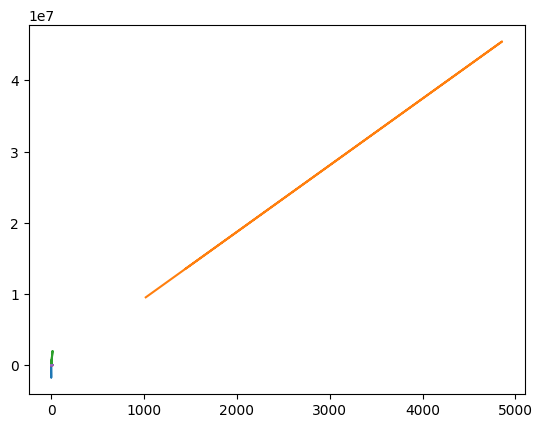

In [38]:
import matplotlib.pyplot as plt
plt.plot(X,yhat)


In [39]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [40]:

r2_score(y_predict,y_test)

0.39628478520146004

In [41]:

mean_absolute_error(y_predict,y_test)

2067800.8178153818

In [42]:

mean_squared_error(y_predict,y_test)

9483374948098.893

In [43]:

import math
math.sqrt(mean_squared_error(y_predict,y_test))

3079508.8809904237